In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit
import re

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

In [2]:
varinfo.clear()

In [3]:
bkgtrees = ObjIter([Tree(filter(os.path.isfile,fc.eightb.preselection_golden.Bkg_MC_List))])
# bkgtrees = ObjIter([])

In [4]:
signaltrees = ObjIter([ Tree(f) for f in fc.eightb.preselection_golden.signal_list ])

In [5]:
for tree in signaltrees: tree.color=None

In [6]:
(bkgtrees+signaltrees).extend(kwargs=lambda t : build_collection(t,'H\dY\d_b\d','bjet',ptordered=True))

[None, None, None, None, None, None, None, None, None]

In [7]:
(bkgtrees+signaltrees).extend(kwargs=lambda t : build_collection(t,'H\dY\d','higgs',ptordered=True))

[None, None, None, None, None, None, None, None, None]

In [8]:
(bkgtrees+signaltrees).extend(kwargs=lambda t : build_collection(t,'Y\d','y',ptordered=True))

[None, None, None, None, None, None, None, None, None]

In [15]:
def calc_btag_vars(tree):
    bjet_btag = tree.bjet_btag.to_numpy()
    bjet_btag.sort()
    
    btagsum = bjet_btag.sum(axis=-1)/8.0
    btag_asym = bjet_btag.std(axis=-1)
    
    tree.extend(btagsum=btagsum, btag_asym=btag_asym)
    
(bkgtrees+signaltrees).apply(calc_btag_vars)


[None, None, None, None, None, None, None, None, None]

{'h_label': ['MC-Bkg', 'MX_700_MY_300', 'MX_900_MY_400', 'MX_1200_MY_500'], 'is_data': [False, False, False, False], 'is_signal': [False, True, True, True], 'density': 0, 'log': 0, 'ratio': 0, 'stacked': True, 'lumi': 2018, 'h_sumw2': True, 'h_label_stat': None, 'scale': [None, 100, 100, 100], 'legend': True, 'h_color': ['grey', None, None, None]}


(<Figure size 864x360 with 2 Axes>,
 array([<AxesSubplot:xlabel='btag_asym', ylabel='Events'>,
        <AxesSubplot:xlabel='btagsum', ylabel='Events'>], dtype=object))

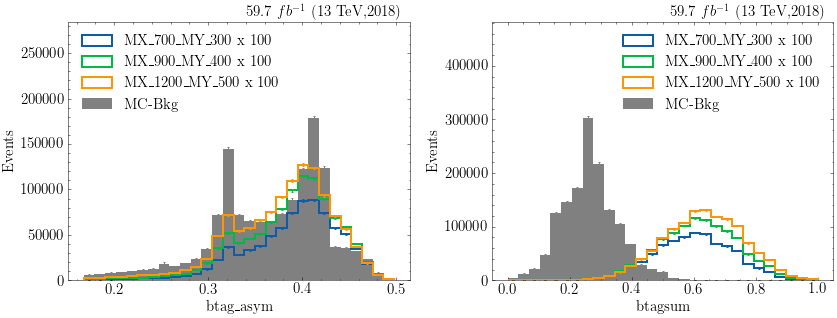

In [21]:
study.quick(   
    bkgtrees + signaltrees[[0,4,7]],
    varlist=['btag_asym','btagsum'],
    stacked=True,
    h_label_stat=None,
    scale=[None] + [100]*3,
    legend=True,
    binlist=[None,np.linspace(0,1,30)]
    # log=True,
    # cumulative=-1,
    # density=True,
    # s_xsec_scales=bkg_rhoscales,
    # dim=(-1,3),
)

(<Figure size 864x720 with 4 Axes>,
 array([[<AxesSubplot:xlabel='DiJet Pt (GeV)', ylabel='Events'>,
         <AxesSubplot:xlabel='higgs_m', ylabel='Events'>],
        [<AxesSubplot:xlabel='y_pt', ylabel='Events'>,
         <AxesSubplot:xlabel='y_m', ylabel='Events'>]], dtype=object))

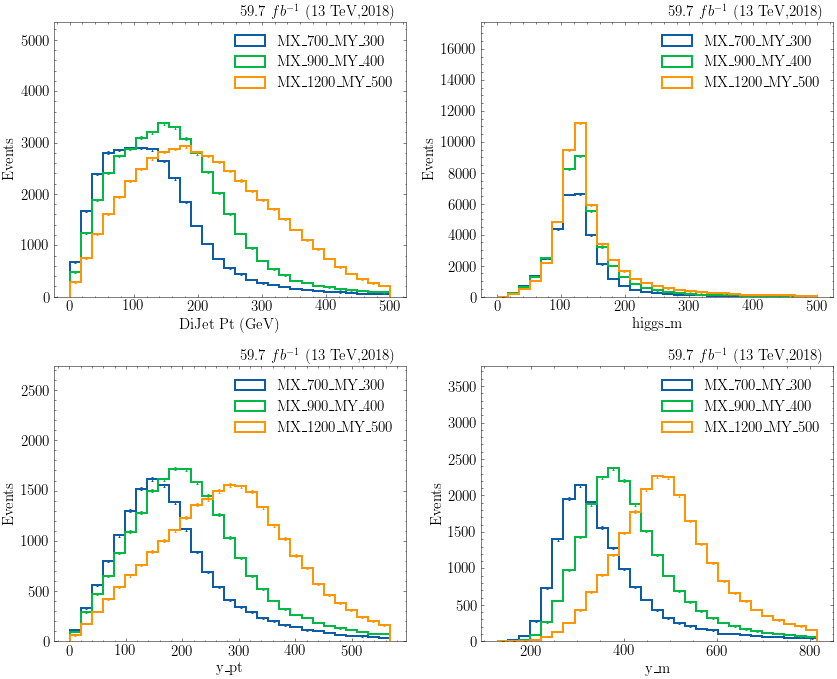

In [25]:
study.quick(   
    bkgtrees + signaltrees[[0,4,7]],
    varlist=['higgs_pt','higgs_m','y_pt','y_m'],
    stacked=True,
    h_label_stat=None,
    h_scale=[10,10,10,],
    legend=True,
    # log=True,
    # cumulative=-1,
    # density=True,
    # s_xsec_scales=bkg_rhoscales,
    # dim=(-1,3),
)

In [26]:
def calc_m_asym(tree):
    higgs_m = tree.higgs_m.to_numpy()
    higgs_m.sort()
    hm12_asym = (higgs_m[:,3]-higgs_m[:,2])/(higgs_m[:,3]+higgs_m[:,2])
    hm13_asym = (higgs_m[:,3]-higgs_m[:,1])/(higgs_m[:,3]+higgs_m[:,1])
    hm14_asym = (higgs_m[:,3]-higgs_m[:,0])/(higgs_m[:,3]+higgs_m[:,0])
    
    hm23_asym = (higgs_m[:,2]-higgs_m[:,1])/(higgs_m[:,2]+higgs_m[:,1])
    hm24_asym = (higgs_m[:,2]-higgs_m[:,0])/(higgs_m[:,2]+higgs_m[:,0])
    
    hm34_asym = (higgs_m[:,1]-higgs_m[:,0])/(higgs_m[:,1]+higgs_m[:,0])
    
    y_m = tree.y_m.to_numpy()
    y_m.sort()
    ym_asym = (y_m[:,1] - y_m[:,0])/(y_m[:,1] + y_m[:,0])
    
    tree.extend(
        hm12_asym=hm12_asym,hm13_asym=hm13_asym,hm14_asym=hm14_asym,
        hm23_asym=hm23_asym,hm24_asym=hm24_asym,hm34_asym=hm34_asym,
        hm1234_asym=(hm12_asym+hm34_asym)/2, ym_asym=ym_asym,
    )
(bkgtrees+signaltrees).apply(calc_m_asym)
    

[None, None, None, None, None, None, None, None]

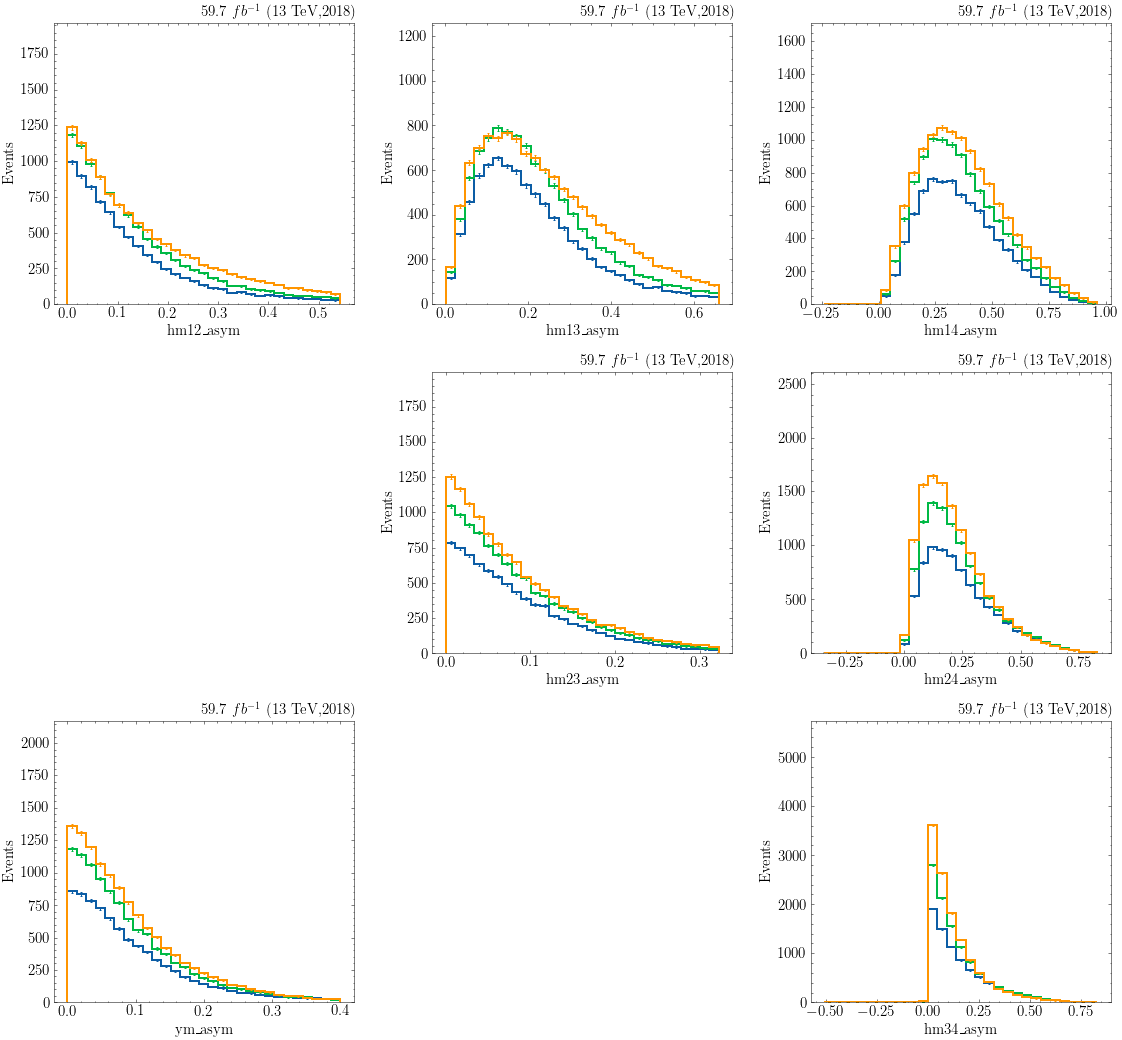

In [27]:
varinfo.higgs_m = dict(bins=np.linspace(0,500,30))

study.quick(
    bkgtrees + signaltrees[[0,4,7]],
    varlist = ["hm12_asym","hm13_asym","hm14_asym",None,"hm23_asym","hm24_asym",'ym_asym',None,"hm34_asym"],
    # binlist=[np.linspace(0,0.6,30)]*9,
    stacked=True,
    h_label_stat=None,
    h_scale=[10]*3,
    # log=True,
    # cumulative=-1,
    # density=True,
    # s_xsec_scales=bkg_rhoscales,
    dim=(-1,3),
);

In [9]:
trees = signaltrees + bkgtrees

In [10]:
def set_asym(tree):
    tree.extend(
        asym1 = tree.hm13_asym,
        asym2 = tree.hm24_asym,
    )
    
(bkgtrees+signaltrees).apply(set_asym)

In [11]:
medium_4btag_filter = EventFilter("medium_4btag",filter=lambda t : ak.sum(t.jet_btag > jet_btagWP[2],axis=-1) > 3)
medium_inv_3btag_filter = EventFilter("medium_inv_3btag",filter=lambda t : ak.sum(t.jet_btag > jet_btagWP[2],axis=-1) == 3)

In [12]:
tr_trees = trees.apply(medium_4btag_filter.filter)
er_trees = trees.apply(medium_inv_3btag_filter.filter)

In [13]:
sig_asym1 = flatten(tr_trees[:-1].asym1.awkward)
sig_asym2 = flatten(tr_trees[:-1].asym2.awkward)
sig_scale = flatten(tr_trees[:-1].scale.awkward)

In [14]:
bkg_asym1 = flatten(tr_trees[[-1]].asym1.awkward)
bkg_asym2 = flatten(tr_trees[[-1]].asym2.awkward)
bkg_scale = flatten(tr_trees[[-1]].scale.awkward)

In [15]:
from scipy.optimize import fmin

sig_total = signaltrees.expected_events(None).numpy.sum()
bkg_total = bkgtrees.expected_events(None).numpy.sum()

def calc_sig_eff(center_x,center_y,radius):
    sig_radius = (sig_asym1 - center_x)**2 + (sig_asym2 - center_y)**2
    sig_mask = sig_radius < radius*radius 
    sig_eff = np.sum(sig_scale[sig_mask])/sig_total 
    return sig_eff
    
def calc_bkg_eff(center_x,center_y,radius):
    bkg_radius = (bkg_asym1 - center_x)**2 + (bkg_asym2 - center_y)**2
    bkg_mask = bkg_radius < radius*radius 
    bkg_eff = np.sum(bkg_scale[bkg_mask])/bkg_total 
    return bkg_eff

In [16]:
def find_ar(params,*args):
    sig_eff = calc_sig_eff(*params,*args)
    return -(sig_total*sig_eff)

ar_min = fmin(find_ar,[0.1,0.1],args=(0.1,))

Optimization terminated successfully.
         Current function value: -0.570633
         Iterations: 19
         Function evaluations: 42


In [17]:
print(ar_min)

calc_sig_eff(*ar_min,0.01), calc_bkg_eff(*ar_min,0.01)

[0.10729004 0.11668945]


(0.00697110914526409, 0.00047763085415732933)

In [18]:
def find_sr(params,*args):
    sig_eff = calc_sig_eff(*args,*params)
    bkg_eff = calc_bkg_eff(*args,*params)
    return bkg_eff/sig_eff

sr_min = fmin(find_sr,[0.1],args=tuple(ar_min)) 

Optimization terminated successfully.
         Current function value: 0.062587
         Iterations: 9
         Function evaluations: 20


In [19]:
print(sr_min) 

calc_sig_eff(*ar_min,*sr_min), calc_bkg_eff(*ar_min,*sr_min)

[0.1109375]


(0.47002006543463637, 0.029416959070875822)

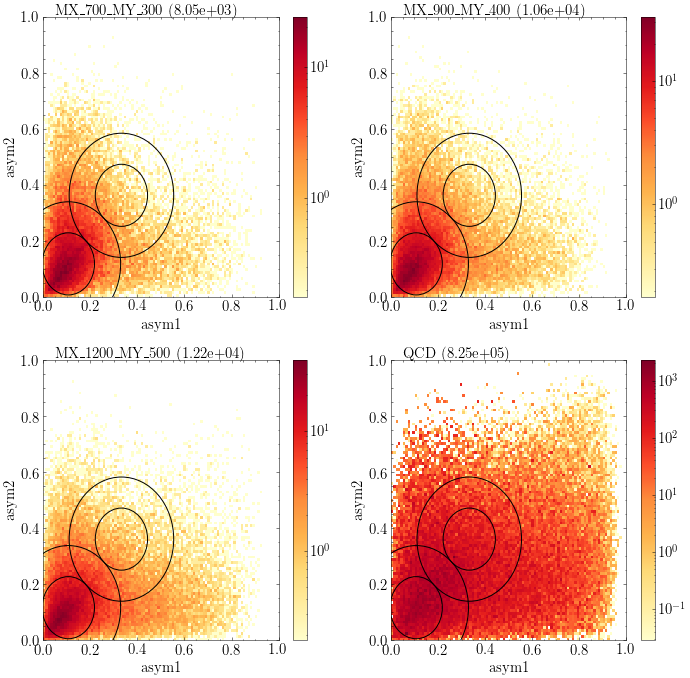

In [20]:
fig,axs = study.quick2d(
    # bkgtrees + signaltrees[[0,4,7]],
    trees[[0,4,7,-1]],
    varlist = ["asym1","asym2"],
    binlist=[np.linspace(0.,1.0,100)]*2,
    stacked=True,
    s_label_stat=None,
    s_xsec_scales=[None]+[10]*3,
    log=True,
    # log=True,
    # cumulative=-1,
    # density=True,
    # s_xsec_scales=bkg_rhoscales,
)

ar = ar_min
# ar = np.array([0.075,0.075])
sr = sr_min[0]
# cr = 1.41*sr
cr = 2*sr
vr = ar + (sr+cr) * ar/np.sqrt((ar**2).sum())

for ax in axs.flat: 
    
    sr_circle = plt.Circle(ar,sr,color='k',fill=None)
    ax.add_patch(sr_circle)
    cr_circle = plt.Circle(ar,cr,color='k',fill=None)
    ax.add_patch(cr_circle)
    
    
    vsr_circle = plt.Circle(vr,sr,color='k',fill=None)
    ax.add_patch(vsr_circle)
    vcr_circle = plt.Circle(vr,cr,color='k',fill=None)
    ax.add_patch(vcr_circle)
    
plt.show()

In [21]:
def hm_asym_diff(tree,ar=ar,vr=vr):
    arx,ary = ar
    vrx,vry = vr
    tree.extend(
        asym_diff= np.sqrt((tree.asym1 - arx)**2 + (tree.asym2 - ary)**2),
        asym_diff_vr= np.sqrt((tree.asym1 - vrx)**2 + (tree.asym2 - vry)**2)
    )

In [22]:
(bkgtrees+signaltrees).apply(lambda t : hm_asym_diff(t,ar=ar,vr=vr))

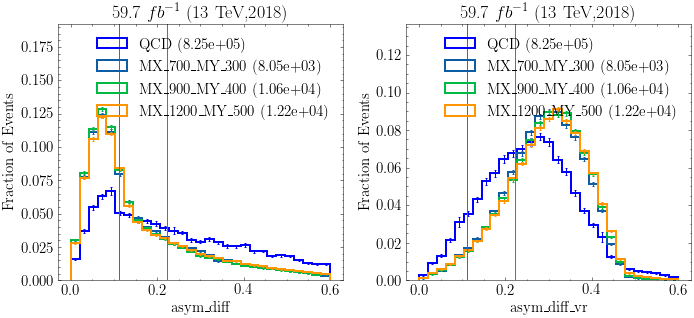

In [23]:
fig,axs = study.quick(
    bkgtrees+signaltrees[[0,4,7]],
    varlist=['asym_diff','asym_diff_vr'],
    binlist=[np.linspace(0,0.6,30)]*2,
    density=True
)

axs[0].plot([sr,sr],axs[0].get_ylim())
axs[0].plot([cr,cr],axs[0].get_ylim())


axs[1].plot([sr,sr],axs[1].get_ylim())
axs[1].plot([cr,cr],axs[1].get_ylim())

plt.show()

In [24]:
tr_trees = trees.apply(medium_4btag_filter.filter)
er_trees = trees.apply(medium_inv_3btag_filter.filter)

In [25]:
asr_filter = EventFilter('asr',asym_diff_max=sr)
acr_filter = EventFilter('acr',asym_diff_min=sr,asym_diff_max=cr)

vsr_filter = EventFilter('vsr',asym_diff_vr_max=sr)
vcr_filter = EventFilter('vcr',asym_diff_vr_min=sr,asym_diff_vr_max=cr)

In [26]:
asrt_trees = tr_trees.apply(asr_filter.filter)
asre_trees = er_trees.apply(asr_filter.filter)

acrt_trees = tr_trees.apply(acr_filter.filter)
acre_trees = er_trees.apply(acr_filter.filter)

In [27]:
vsrt_trees = tr_trees.apply(vsr_filter.filter)
vsre_trees = er_trees.apply(vsr_filter.filter)

vcrt_trees = tr_trees.apply(vcr_filter.filter)
vcre_trees = er_trees.apply(vcr_filter.filter)

In [28]:
def get_eff(region,trees=trees):
    eff = region.expected_events().numpy/trees.expected_events().numpy
    sig_eff,bkg_eff = eff[:-1],eff[-1:]
    sig_eff = get_avg_std(sig_eff)
    bkg_eff = get_avg_std(bkg_eff)
    return np.array([sig_eff,bkg_eff])

In [29]:
def get_matched_eff(region):
    region = region[:-1]
    n_all_matched = region.nfound_select.apply(lambda array : ak.sum(array == 8)).npy
    n_all = region.nfound_select.apply(lambda array : ak.count(array)).npy
    eff = n_all_matched/n_all 
    return get_avg_std(eff)

In [30]:
ariter = ObjIter([asrt_trees,asre_trees,acrt_trees,acre_trees])
ar_effs = ariter.apply(get_eff).numpy

ar_matched_effs = ariter.apply(get_matched_eff).numpy

In [31]:
vriter = ObjIter([vsrt_trees,vsre_trees,vcrt_trees,vcre_trees])
vr_effs = vriter.apply(get_eff).numpy

vr_matched_effs = vriter.apply(get_matched_eff).numpy

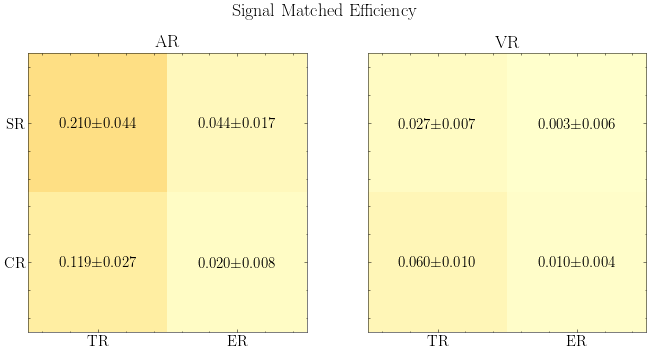

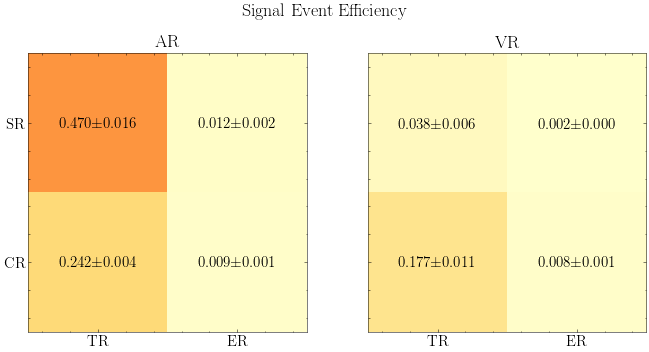

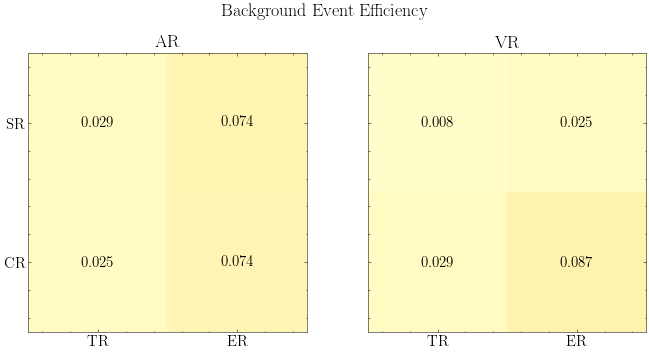

In [32]:
sig_total = signaltrees.expected_events().numpy.sum()
bkg_total = bkgtrees.expected_events().numpy.sum()

def plot_effs(effs,ax,**kwargs):
    eff = effs[:,0].reshape(2,2)
    std = effs[:,1].reshape(2,2)
    im = ax.imshow(eff,vmin=0,vmax=1,cmap='YlOrRd')
    ax.set(yticks=[0,1],yticklabels=['SR','CR'],xticks=[0,1],xticklabels=['TR','ER'],**kwargs)
    for i in range(2):
        for j in range(2):
            txt = f'{eff[j,i]:0.3f}'
            if (std[j,i] > 0): txt += f'$\pm${std[j,i]:0.3f}'
            ax.text(i,j,f'{txt}',ha="center", va="center", fontweight="bold")   
            
fig,ax = plt.subplots(ncols=2,figsize=(10,5),sharey=True)
plot_effs(ar_matched_effs,ax[0],title='AR')
plot_effs(vr_matched_effs,ax[1],title='VR')
fig.suptitle('Signal Matched Efficiency')
fig.tight_layout()
            
fig,ax = plt.subplots(ncols=2,figsize=(10,5),sharey=True)
plot_effs(ar_effs[:,0],ax[0],title='AR')
plot_effs(vr_effs[:,0],ax[1],title='VR')
fig.suptitle('Signal Event Efficiency')
fig.tight_layout()

fig,ax = plt.subplots(ncols=2,figsize=(10,5),sharey=True)
plot_effs(ar_effs[:,1],ax[0],title='AR')
plot_effs(vr_effs[:,1],ax[1],title='VR')
fig.suptitle('Background Event Efficiency')
fig.tight_layout()

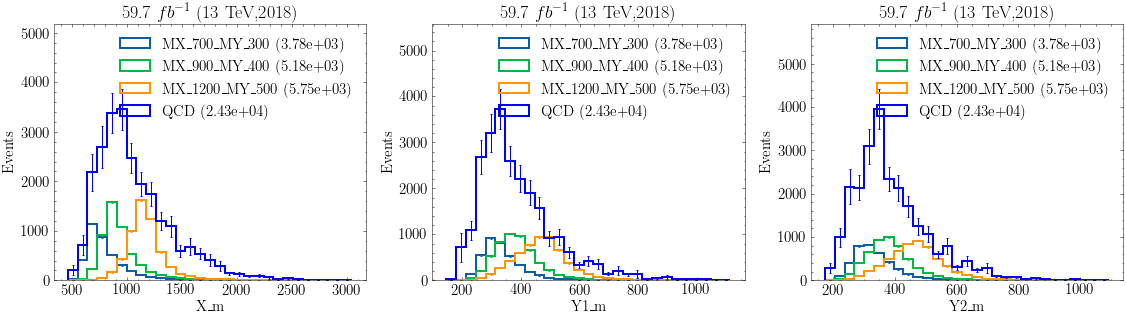

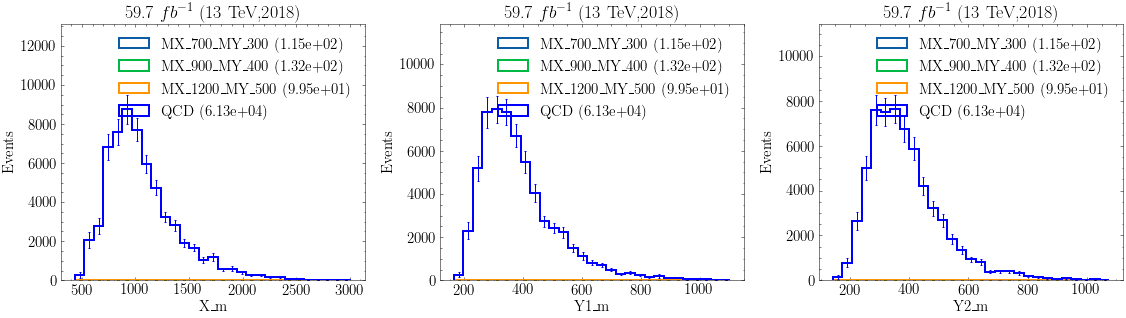

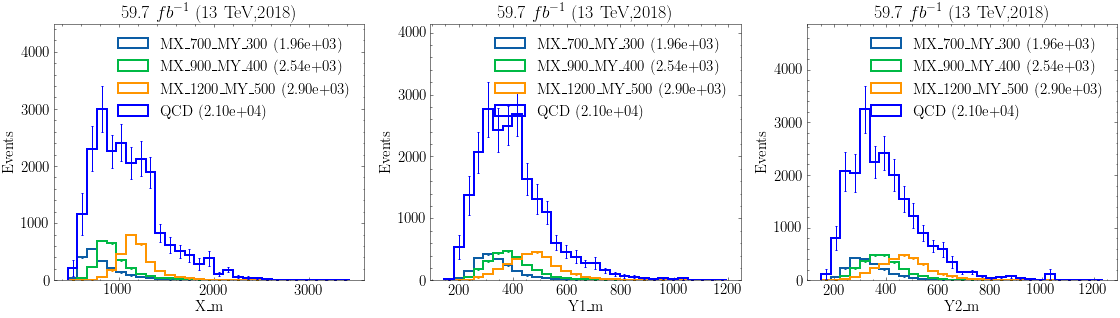

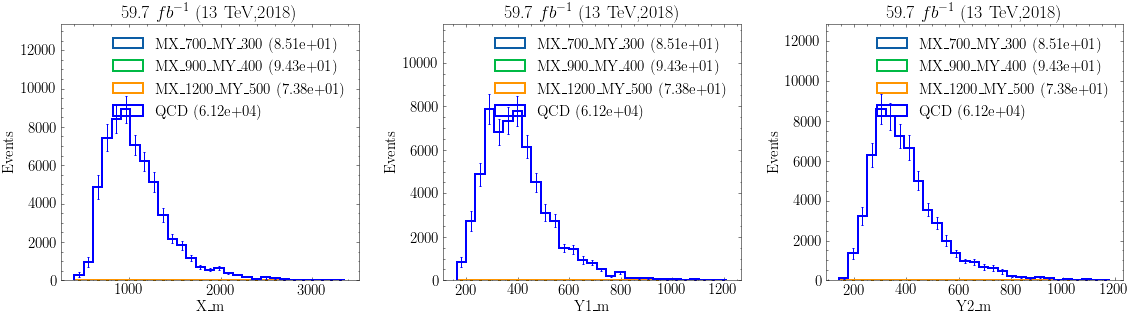

In [34]:
for ar_trees in ariter:
    study.quick(
        ar_trees[[0,4,7,-1]],
        varlist=['X_m','Y1_m','Y2_m'],
        # binlist=[np.linspace(0,300,30)]
        # s_xsec_scales=[10,10,10,None],
        dim=(-1,3)
    )